# <center> Spring 2022 CS559 Project 1: Classification of Circles: Linear Transformation Classification of Unsupervised Learning </center>
## <center> Due: 3/4/2022 11:59 PM </center>

<b>Objective</b>: In this project, students are going to train a linear classification model with the given training set and regularize the model using the given test set. 

When the training data is plotted, the plot will show three circles. The objective is to test where each observation in the test data set will belong to which circle using linear classifiers. Unfortunately, the label of circles are not unknown so we have to assign the circle ID using the clustering techniques. We will use KMeans and the found cluster ID will be the circle ID. Once the circles are all clustered properly, we can make models that classifies the circle and regularize the model using the test data set. 

<b>Note</b>: 
1. This project is an individual project and students are not allowed to work together. For any evidences, the project will mark 0 and will report to the University. Students are not allowed to use outside resources directly (no direct copies of work, code, etc.). 
2. Students are allowed to use any built-in functions or make functions.
3. Students are allowed to make any visualizations. 

<b>Data</b>: Two datasets are given and they are training and test sets. 
1. They are completed - no missing values. 
2. No labels. 
3. Non-linear. 

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [2]:
df_train = pd.read_csv('./CS559_S22_train.csv')
df_test = pd.read_csv('./CS559_S22_test.csv')

In [3]:
df_train.head(20)

,Unnamed: 0,0,1
0,0,1.990883,-0.403233
1,1,-3.853454,-1.252172
2,2,3.887177,2.267125
3,3,-3.475760,1.592513
4,4,0.663024,-1.520762
5,5,1.778471,-0.767431
6,6,-1.807315,-3.496680
7,7,1.958486,2.241154
8,8,-1.680833,4.174302
9,9,-3.653391,-1.768593


In [4]:
df_test

,Unnamed: 0,0,1
0,0,-1.749593,-0.156003
1,1,0.368625,3.140500
2,2,-1.799280,0.049168
3,3,-0.177061,-3.735070
4,4,3.160910,3.202912
5,5,-3.264976,1.895905
6,6,-0.914822,-3.725331
7,7,2.097375,0.938554
8,8,0.006415,3.213170
9,9,-1.898791,4.079779


In [5]:
import matplotlib.pyplot as plt

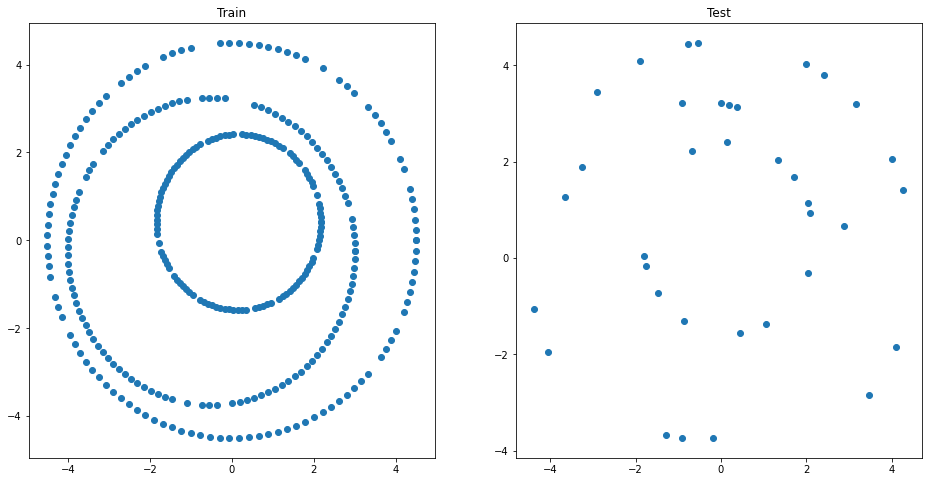

In [6]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(16,8))
ax1.scatter(df_train.iloc[:,1],df_train.iloc[:,2])
ax1.set_title('Train')
ax2.scatter(df_test.iloc[:,1],df_test.iloc[:,2])
ax2.set_title('Test')
plt.show()

# Task1: Clustering - Checking [10 pts]
Run KMeans and verify the clustering result. Did cluster IDs assign to each circle correctly? 

Build a linear classification model using `sklearn` to classify the the cluster IDs using Logistic Regression and KNN. When you use KNN, use different neighbor numbers [1, 10, 50, 100].

Report the accuracy of each model using `accuracy_score`. 

Explain why KMeans did not cluster by the circle and evaluate the model.

In [7]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [8]:
x = df_train.iloc[:,1:3] # 1t for rows and second for columns
x

,0,1
0,1.990883,-0.403233
1,-3.853454,-1.252172
2,3.887177,2.267125
3,-3.475760,1.592513
4,0.663024,-1.520762
...,...,...
319,-3.969552,0.210658
320,-1.231483,4.328215
321,-0.380659,2.340318
322,2.005823,-4.028235


In [9]:
kmeans = KMeans(3)
kmeans.fit(x)

KMeans(n_clusters=3)

In [10]:
identified_clusters = kmeans.fit_predict(x)
identified_clusters

array([1, 2, 1, 2, 0, 1, 0, 1, 2, 2, 2, 0, 0, 0, 0, 2, 2, 1, 0, 0, 2, 1,
       1, 0, 1, 2, 2, 0, 1, 1, 2, 1, 2, 2, 1, 2, 0, 0, 0, 0, 1, 0, 0, 2,
       1, 2, 2, 2, 0, 0, 2, 2, 1, 1, 0, 2, 0, 1, 1, 2, 0, 2, 2, 0, 1, 1,
       2, 1, 1, 0, 1, 2, 2, 0, 1, 1, 0, 1, 2, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       2, 0, 0, 1, 0, 2, 1, 1, 0, 0, 0, 1, 0, 1, 1, 2, 0, 1, 1, 0, 1, 2,
       1, 0, 2, 2, 0, 0, 2, 1, 2, 0, 1, 1, 2, 1, 1, 2, 1, 2, 1, 0, 2, 2,
       2, 0, 0, 1, 0, 1, 1, 0, 2, 0, 1, 1, 1, 1, 2, 2, 0, 2, 1, 0, 2, 0,
       1, 1, 0, 2, 0, 2, 1, 2, 1, 0, 2, 1, 2, 1, 1, 2, 0, 0, 1, 1, 2, 0,
       2, 2, 0, 1, 0, 0, 1, 2, 2, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 2, 0,
       1, 0, 2, 1, 0, 2, 2, 2, 2, 2, 1, 1, 0, 2, 1, 0, 0, 2, 0, 2, 2, 2,
       0, 1, 1, 2, 1, 2, 0, 0, 2, 1, 2, 0, 1, 2, 2, 1, 1, 0, 0, 0, 0, 2,
       0, 2, 2, 0, 1, 1, 0, 2, 2, 2, 1, 1, 0, 0, 1, 1, 0, 2, 0, 2, 1, 1,
       1, 2, 1, 2, 1, 2, 1, 2, 0, 1, 1, 0, 2, 1, 1, 1, 0, 2, 2, 2, 2, 0,
       2, 0, 2, 2, 0, 1, 0, 0, 1, 1, 0, 2, 1, 2, 1,

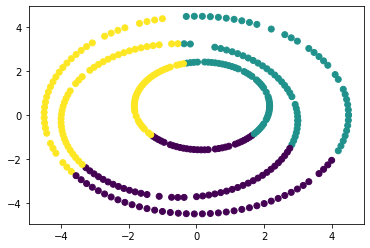

In [11]:
data_with_clusters = x.copy()
data_with_clusters['Clusters'] = identified_clusters 
plt.scatter(data_with_clusters['0'],data_with_clusters['1'],c=data_with_clusters['Clusters'])

In [12]:
x['identified_clusters'] = identified_clusters
x

,0,1,identified_clusters
0,1.990883,-0.403233,1
1,-3.853454,-1.252172,2
2,3.887177,2.267125,1
3,-3.475760,1.592513,2
4,0.663024,-1.520762,0
...,...,...,...
319,-3.969552,0.210658,2
320,-1.231483,4.328215,2
321,-0.380659,2.340318,2
322,2.005823,-4.028235,0


In [13]:
x_train = x[['0','1']]
y_train = x['identified_clusters']
print(x_train)
print(y_train)

            0         1
0    1.990883 -0.403233
1   -3.853454 -1.252172
2    3.887177  2.267125
3   -3.475760  1.592513
4    0.663024 -1.520762
..        ...       ...
319 -3.969552  0.210658
320 -1.231483  4.328215
321 -0.380659  2.340318
322  2.005823 -4.028235
323  0.546349 -3.589933

[324 rows x 2 columns]
0      1
1      2
2      1
3      2
4      0
      ..
319    2
320    2
321    2
322    0
323    0
Name: identified_clusters, Length: 324, dtype: int32


In [14]:
x_test = df_test[['0','1']]
x_test

,0,1
0,-1.749593,-0.156003
1,0.368625,3.140500
2,-1.799280,0.049168
3,-0.177061,-3.735070
4,3.160910,3.202912
5,-3.264976,1.895905
6,-0.914822,-3.725331
7,2.097375,0.938554
8,0.006415,3.213170
9,-1.898791,4.079779


In [15]:
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression()
logisticRegr.fit(x_train, y_train)
predictions_train = logisticRegr.predict(x_train)
predictions_train

array([1, 2, 1, 2, 0, 1, 0, 1, 2, 2, 2, 0, 0, 0, 0, 2, 2, 1, 0, 0, 2, 1,
       1, 0, 1, 2, 2, 0, 1, 1, 2, 1, 2, 2, 1, 2, 0, 0, 0, 0, 1, 0, 0, 2,
       1, 2, 2, 2, 0, 0, 2, 2, 1, 1, 0, 2, 0, 1, 1, 2, 0, 2, 2, 0, 1, 1,
       2, 1, 1, 0, 1, 2, 2, 0, 1, 1, 0, 1, 2, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       2, 0, 0, 1, 0, 2, 1, 1, 0, 0, 0, 1, 0, 1, 1, 2, 0, 1, 1, 0, 1, 2,
       1, 0, 2, 2, 0, 0, 2, 1, 2, 0, 1, 1, 2, 1, 1, 2, 1, 2, 1, 0, 2, 2,
       2, 0, 0, 1, 0, 1, 1, 0, 2, 0, 1, 1, 1, 1, 2, 2, 0, 2, 1, 0, 2, 0,
       1, 1, 0, 2, 0, 2, 1, 2, 1, 0, 2, 1, 2, 1, 1, 2, 0, 0, 1, 1, 2, 0,
       2, 2, 0, 1, 0, 0, 1, 2, 2, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 2, 0,
       1, 0, 2, 1, 0, 2, 2, 2, 2, 2, 1, 1, 0, 2, 1, 0, 0, 2, 0, 2, 2, 2,
       0, 1, 1, 2, 1, 2, 0, 0, 2, 1, 2, 0, 1, 2, 2, 1, 1, 0, 0, 0, 0, 2,
       0, 2, 2, 0, 1, 1, 0, 2, 2, 2, 1, 1, 0, 0, 1, 1, 0, 2, 0, 2, 1, 1,
       1, 2, 1, 2, 1, 2, 1, 2, 0, 1, 1, 0, 2, 1, 1, 1, 0, 2, 2, 2, 2, 0,
       2, 0, 2, 2, 0, 1, 0, 0, 1, 1, 0, 2, 1, 2, 1,

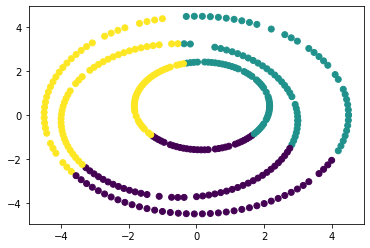

In [16]:
data_with_clusters = df_train.copy()
data_with_clusters['Clusters'] = predictions_train 
plt.scatter(data_with_clusters['0'],data_with_clusters['1'],c=data_with_clusters['Clusters'])

In [17]:
from sklearn.metrics import accuracy_score

# Accuracy score for K means model:
acc_LR = accuracy_score(y_true=identified_clusters, y_pred=predictions_train)
print("The accuracy of logistic Regression:",acc_LR)

The accuracy of logistic Regression: 1.0


In [18]:
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression()
logisticRegr.fit(x_train, y_train)
predictions_test = logisticRegr.predict(x_test)
predictions_test

array([2, 1, 2, 0, 1, 2, 0, 1, 1, 2, 1, 2, 2, 0, 2, 2, 0, 1, 0, 1, 0, 1,
       1, 1, 2, 2, 1, 0, 1, 1, 2, 2, 1, 1, 1, 1], dtype=int32)

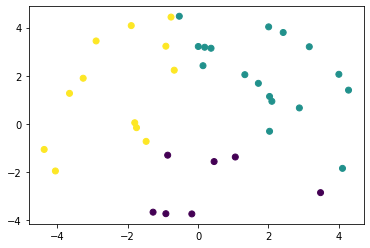

In [19]:
data_with_clusters = df_test.copy()
data_with_clusters['Clusters'] = predictions_test 
plt.scatter(data_with_clusters['0'],data_with_clusters['1'],c=data_with_clusters['Clusters'])

## KNN

In [20]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

In [21]:
scaler = StandardScaler()
scaler.fit(x_train)

x_std_train = scaler.transform(x_train)
x_std_test = scaler.transform(x_test)


In [22]:
def KNNclassifier(i):
    classifier = KNeighborsClassifier(n_neighbors=i)
    classifier.fit(x_std_train, y_train)
    y_pred = classifier.predict(x_std_train)
    return y_pred

In [23]:
C = []
nearest_neighbors = [1,10,50,100]
for i in nearest_neighbors:
    c = KNNclassifier(i)
    C.append(c)
C_df = pd.DataFrame(C)
C_df = C_df.T
C_df

,0,1,2,3
0,1,1,1,1
1,2,2,2,2
2,1,1,1,1
3,2,2,2,2
4,0,0,0,0
...,...,...,...,...
319,2,2,2,2
320,2,2,2,2
321,2,1,2,2
322,0,0,0,0


In [24]:
result = pd.concat([df_train, C_df], axis=1, join="inner")
result

,Unnamed: 0,0,1,0,1,2,3
0,0,1.990883,-0.403233,1,1,1,1
1,1,-3.853454,-1.252172,2,2,2,2
2,2,3.887177,2.267125,1,1,1,1
3,3,-3.475760,1.592513,2,2,2,2
4,4,0.663024,-1.520762,0,0,0,0
...,...,...,...,...,...,...,...
319,319,-3.969552,0.210658,2,2,2,2
320,320,-1.231483,4.328215,2,2,2,2
321,321,-0.380659,2.340318,2,1,2,2
322,322,2.005823,-4.028235,0,0,0,0


Text(0.5, 1.0, 'Nearest_Neighbors = 10 ')

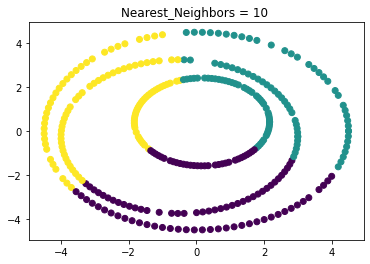

In [25]:
plt.scatter(result['0'],result['1'],c=result[1])
plt.title("Nearest_Neighbors = 10 ")

Text(0.5, 1.0, 'Nearest_Neighbors = 1 ')

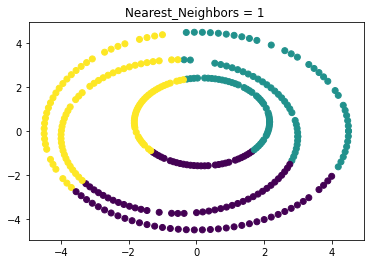

In [26]:
plt.scatter(result['0'],result['1'],c=result[0])
plt.title("Nearest_Neighbors = 1 ")

Text(0.5, 1.0, 'Nearest_Neighbors = 50 ')

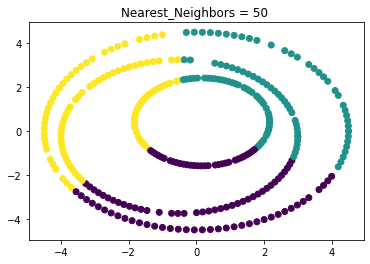

In [27]:
plt.scatter(result['0'],result['1'],c=result[1])
plt.title("Nearest_Neighbors = 50 ")

Text(0.5, 1.0, 'Nearest_Neighbors = 100 ')

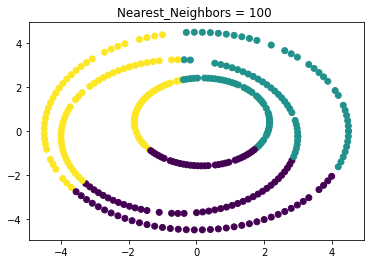

In [28]:
plt.scatter(result['0'],result['1'],c=result[1])
plt.title("Nearest_Neighbors = 100 ")

In [29]:
cc1 = KNNclassifier(1)
cc10 = KNNclassifier(10)
cc50 = KNNclassifier(50)
cc100 = KNNclassifier(100)
# Accuracy score for K means model:
acc_score_knn1 = accuracy_score(y_true=identified_clusters, y_pred=cc1)
print("Accuracy Score for KNN when Near_neighbors = 1:",acc_score_knn1)
acc_score_knn10 = accuracy_score(y_true=identified_clusters, y_pred=cc10)
print("Accuracy Score for KNN when Near_neighbors = 10:",acc_score_knn10)
acc_score_knn50 = accuracy_score(y_true=identified_clusters, y_pred=cc50)
print("Accuracy Score for KNN when Near_neighbors = 50:",acc_score_knn50)
acc_score_knn100 = accuracy_score(y_true=identified_clusters, y_pred=cc100)
print("Accuracy Score for KNN when Near_neighbors = 100:",acc_score_knn100)

Accuracy Score for KNN when Near_neighbors = 1: 1.0
Accuracy Score for KNN when Near_neighbors = 10: 0.9876543209876543
Accuracy Score for KNN when Near_neighbors = 50: 0.9907407407407407
Accuracy Score for KNN when Near_neighbors = 100: 0.9938271604938271


In [30]:
def KNNclassifierTest(i):
    classifier = KNeighborsClassifier(n_neighbors=i)
    classifier.fit(x_std_train, y_train)
    y_pred = classifier.predict(x_test)
    return y_pred

In [31]:
C = []
nearest_neighbors = [1,5,10,20]
for i in nearest_neighbors:
    c = KNNclassifierTest(i)
    C.append(c)
C_Test_df = pd.DataFrame(C)
C_Test_df = C_Test_df.T
C_Test_df

,0,1,2,3
0,2,2,2,2
1,1,1,1,1
2,2,2,2,2
3,0,0,0,0
4,1,1,1,1
5,2,2,2,2
6,0,0,0,0
7,1,1,1,1
8,1,1,1,1
9,2,2,2,2


In [32]:
result_test = pd.concat([df_test, C_Test_df], axis=1, join="inner")
result_test

,Unnamed: 0,0,1,0,1,2,3
0,0,-1.749593,-0.156003,2,2,2,2
1,1,0.368625,3.140500,1,1,1,1
2,2,-1.799280,0.049168,2,2,2,2
3,3,-0.177061,-3.735070,0,0,0,0
4,4,3.160910,3.202912,1,1,1,1
5,5,-3.264976,1.895905,2,2,2,2
6,6,-0.914822,-3.725331,0,0,0,0
7,7,2.097375,0.938554,1,1,1,1
8,8,0.006415,3.213170,1,1,1,1
9,9,-1.898791,4.079779,2,2,2,2


Text(0.5, 1.0, 'Nearest_Neighbors = 1 ')

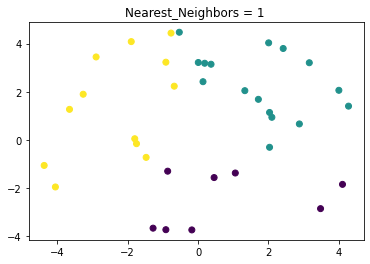

In [33]:
plt.scatter(result_test['0'],result_test['1'],c=result_test[0])
plt.title("Nearest_Neighbors = 1 ")

Text(0.5, 1.0, 'Nearest_Neighbors = 5 ')

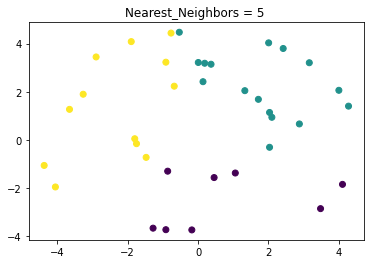

In [34]:
plt.scatter(result_test['0'],result_test['1'],c=result_test[1])
plt.title("Nearest_Neighbors = 5 ")

Text(0.5, 1.0, 'Nearest_Neighbors = 10 ')

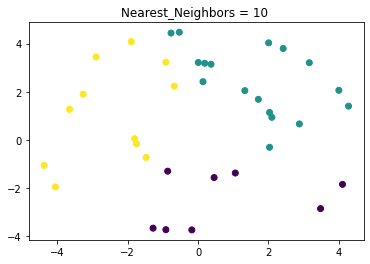

In [35]:
plt.scatter(result_test['0'],result_test['1'],c=result_test[2])
plt.title("Nearest_Neighbors = 10 ")

Text(0.5, 1.0, 'Nearest_Neighbors = 20 ')

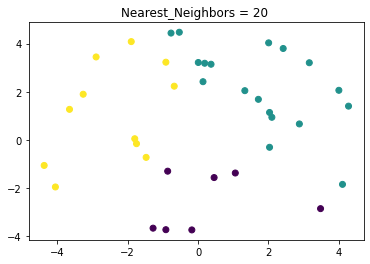

In [36]:
plt.scatter(result_test['0'],result_test['1'],c=result_test[3])
plt.title("Nearest_Neighbors = 20 ")

**Explanation:** k-means clustering aims to partition n observations into k clusters in which each observation belongs to the cluster with the nearest mean

Three concentric circles would have the exact same mean, so k-means is not suitable to separate them. The result is not really what you should expect here.

Now, if you know that your clusters will always be concentric circles, you can simply convert your cartesian (x-y) coordinates to polar coordinates, and use only the radius rho for clustering - as you know that the angle theta doesn't matter

# Task 2: New Training Data
Perform feature engineering to make a new traning data set so it can train KMeans cluster so it can cluster each circle. Explain the workflow. Remember that EDA is not necessary. 

## Principal Component Analysis (PCA)

In [37]:
df_train = x_train[['0','1']]
df_train

,0,1
0,1.990883,-0.403233
1,-3.853454,-1.252172
2,3.887177,2.267125
3,-3.475760,1.592513
4,0.663024,-1.520762
...,...,...
319,-3.969552,0.210658
320,-1.231483,4.328215
321,-0.380659,2.340318
322,2.005823,-4.028235


In [38]:
from sklearn.decomposition import PCA

In [39]:
pca = PCA(n_components=2)
pca.fit(df_train)
X_pca = pca.transform(df_train)
print("original shape:   ", df_train.shape)
print("transformed shape:", X_pca.shape)
X_pca_df = pd. DataFrame(X_pca)
X_pca_df

original shape:    (324, 2)
transformed shape: (324, 2)


,0,1
0,2.096144,-0.400775
1,-3.763296,-1.138290
2,4.042935,2.232996
3,-3.331511,1.698688
4,0.747249,-1.492820
...,...,...
319,-3.851523,0.326485
320,-1.035557,4.391166
321,-0.222734,2.387430
322,2.042065,-4.025404


## LDA 

In [40]:
x_lda = x.iloc[:, 0:2].values
y_lda = x.iloc[:, 2:3].values

In [41]:
sc = StandardScaler()
x_train_lda = sc.fit_transform(x_lda)
x_test_lda = sc.transform(x_test)

In [42]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA(n_components=2)
X_train = lda.fit_transform(x_train_lda, y_lda)
X_test = lda.transform(x_test_lda)


In [43]:
lda_df = pd.DataFrame(X_train)
lda_df

,0,1
0,-1.395703,-0.071513
1,2.204545,1.313019
2,-2.204580,-2.054685
3,2.390406,-0.563339
4,-0.716426,0.835295
...,...,...
319,2.498048,0.392777
320,1.369382,-2.638427
321,0.528490,-1.487580
322,-1.949054,2.248153


In [44]:
kmeans = KMeans(3)
kmeans.fit(lda_df)

KMeans(n_clusters=3)

In [45]:
identified_clusters1 = kmeans.fit_predict(lda_df)
identified_clusters1

array([1, 0, 1, 0, 2, 1, 2, 1, 0, 2, 0, 2, 2, 2, 2, 0, 0, 1, 2, 2, 0, 1,
       1, 2, 1, 0, 2, 2, 1, 1, 0, 1, 0, 0, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       1, 0, 0, 0, 2, 2, 0, 0, 1, 1, 2, 0, 1, 1, 1, 0, 1, 0, 0, 2, 0, 1,
       0, 1, 1, 2, 1, 0, 0, 2, 0, 1, 2, 1, 0, 1, 1, 2, 1, 2, 2, 2, 1, 1,
       0, 2, 2, 1, 2, 0, 1, 1, 2, 2, 2, 1, 2, 1, 1, 0, 2, 1, 1, 2, 1, 0,
       1, 2, 0, 0, 2, 2, 0, 1, 0, 2, 1, 1, 0, 1, 1, 0, 1, 0, 1, 2, 0, 0,
       2, 1, 2, 1, 2, 1, 1, 2, 0, 2, 1, 1, 1, 1, 0, 0, 1, 0, 1, 2, 0, 1,
       1, 1, 2, 0, 2, 0, 1, 2, 1, 2, 0, 0, 0, 0, 1, 0, 2, 2, 1, 1, 0, 2,
       0, 0, 2, 1, 2, 2, 1, 0, 0, 1, 2, 0, 2, 2, 1, 2, 1, 1, 2, 2, 0, 2,
       1, 2, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 2, 0, 0, 2, 2, 0, 2, 0, 0, 0,
       2, 1, 1, 0, 1, 0, 1, 2, 0, 1, 0, 2, 0, 0, 0, 1, 1, 2, 2, 1, 2, 0,
       2, 0, 0, 2, 1, 1, 2, 2, 0, 2, 1, 1, 1, 2, 1, 0, 2, 0, 2, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 2, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 2, 0, 0, 2, 1, 2, 2, 0, 1, 2, 0, 1, 0, 1,

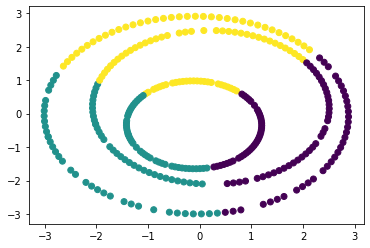

In [46]:
data_with_clusters = lda_df.copy()
data_with_clusters['Clusters'] = identified_clusters1 
plt.scatter(data_with_clusters[0],data_with_clusters[1],c=data_with_clusters['Clusters'])

In [47]:
data_with_clusters

,0,1,Clusters
0,-1.395703,-0.071513,1
1,2.204545,1.313019,0
2,-2.204580,-2.054685,1
3,2.390406,-0.563339,0
4,-0.716426,0.835295,2
...,...,...,...
319,2.498048,0.392777,0
320,1.369382,-2.638427,0
321,0.528490,-1.487580,0
322,-1.949054,2.248153,2


## Workflow: 
- Performed the Principal Component Analysis (PCA) and LDA on the training dataset to perform feature engineering as per mentioned in the question. Initially, I performed the PCA and get the desire output. For LDA, I standardize the dataset and performed LDA on it.

# Task 3: Re-cluster using the new training set.
Do the clustering again and observe if each circle its owns cluster ID.  Evaluate the feature engineering work. 

In [48]:
from sklearn.cluster import SpectralClustering
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import seaborn as sns

In [49]:
x

,0,1,identified_clusters
0,1.990883,-0.403233,1
1,-3.853454,-1.252172,2
2,3.887177,2.267125,1
3,-3.475760,1.592513,2
4,0.663024,-1.520762,0
...,...,...,...
319,-3.969552,0.210658,2
320,-1.231483,4.328215,2
321,-0.380659,2.340318,2
322,2.005823,-4.028235,0


[1 2 0 2 1 1 2 2 0 2 1 0 2 0 2 1 1 2 1 1 0 1 2 0 0 1 1 1 1 2 1 0 2 1 1 2 2
 1 1 2 1 0 1 2 2 0 2 0 2 2 1 2 0 2 2 2 2 0 2 1 2 1 1 0 1 2 2 2 0 2 1 1 1 2
 2 2 2 0 2 2 2 2 1 2 2 1 1 2 2 2 2 2 2 2 2 1 0 1 2 1 2 1 1 0 2 0 1 2 0 0 0
 1 0 2 2 2 1 0 0 2 0 1 1 0 1 2 0 1 0 2 1 2 2 0 1 0 2 1 0 2 2 1 2 1 1 2 0 2
 1 2 2 2 2 1 1 0 2 1 1 0 1 2 1 0 2 0 1 1 1 2 2 2 1 2 1 1 2 0 1 2 0 2 1 0 1
 0 1 1 2 2 0 1 2 2 2 2 2 2 0 1 2 1 1 1 2 0 1 1 0 0 0 2 2 2 1 1 2 0 0 2 2 1
 0 0 2 1 2 0 0 0 2 2 0 1 2 0 1 2 2 1 2 2 2 2 0 2 2 2 1 2 1 2 2 0 2 2 1 0 0
 0 1 2 1 1 1 1 0 1 0 2 1 2 1 1 0 0 1 1 2 2 0 1 0 2 2 0 0 1 2 2 2 1 2 0 1 0
 0 2 1 0 1 0 2 1 0 0 2 1 2 1 2 2 2 1 2 2 2 1 2 2 0 1 0 2]


[Text(0.5, 1.0, 'Spectral Clustering')]

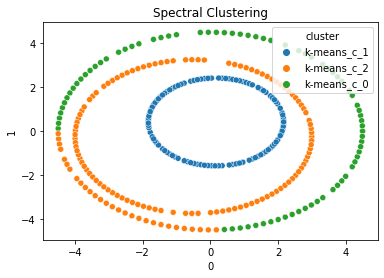

In [50]:
spec_cl = SpectralClustering(n_clusters=3,n_neighbors=5, affinity='nearest_neighbors')
cluster_x = spec_cl.fit_predict(df_train)
print(cluster_x)
cluster = ['k-means_c_' + str(c) for c in cluster_x]

fig, ax = plt.subplots()
sns.scatterplot(x='0', y='1', data=df_train.assign(cluster = cluster), hue='cluster', ax=ax)
ax.set(title='Spectral Clustering')

[Text(0.5, 1.0, 'Spectral Clustering')]

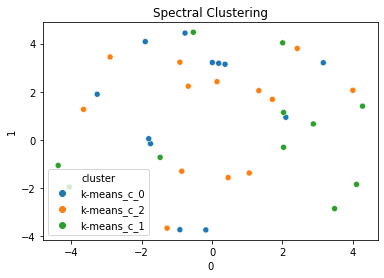

In [51]:
spec_cl = SpectralClustering(n_clusters=3, n_neighbors=5, affinity='nearest_neighbors')
cluster = spec_cl.fit_predict(df_test)
cluster = ['k-means_c_' + str(c) for c in cluster]

fig, ax = plt.subplots()
sns.scatterplot(x='0', y='1', data=df_test.assign(cluster = cluster), hue='cluster', ax=ax)
ax.set(title='Spectral Clustering')

# Task 4: Train the linear classification models
Use Logistic Regression, Perceptron, and LDA to classify the clucter ID (the circle). Present the performance of training models and evaluate individual models.

In [52]:
sc_df = df_train[['0','1']]
sc_df['SC Predict'] = cluster_x
sc_df

,0,1,SC Predict
0,1.990883,-0.403233,1
1,-3.853454,-1.252172,2
2,3.887177,2.267125,0
3,-3.475760,1.592513,2
4,0.663024,-1.520762,1
...,...,...,...
319,-3.969552,0.210658,2
320,-1.231483,4.328215,0
321,-0.380659,2.340318,1
322,2.005823,-4.028235,0


In [53]:
sc_df_x_train = sc_df[['0','1']]
sc_df_y_train = sc_df['SC Predict']

In [54]:
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression()
logisticRegr.fit(sc_df_x_train, sc_df_y_train)
predictions_train_sc = logisticRegr.predict(sc_df_x_train)
predictions_train_sc

array([1, 2, 0, 2, 2, 1, 2, 0, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 1,
       1, 2, 0, 2, 2, 2, 1, 1, 2, 0, 1, 1, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       0, 2, 2, 1, 2, 2, 1, 2, 1, 0, 2, 2, 2, 0, 1, 2, 1, 1, 2, 2, 1, 0,
       2, 1, 0, 2, 1, 1, 1, 2, 1, 1, 2, 0, 1, 1, 0, 2, 2, 2, 2, 2, 1, 0,
       2, 2, 2, 1, 2, 2, 1, 1, 2, 2, 2, 1, 2, 1, 1, 2, 2, 0, 1, 2, 0, 1,
       0, 2, 2, 2, 2, 2, 1, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 2, 0, 2, 2, 2,
       2, 1, 2, 0, 2, 1, 0, 2, 2, 2, 0, 1, 1, 1, 2, 1, 2, 2, 1, 2, 1, 2,
       1, 0, 2, 1, 2, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1, 2, 2, 2, 1, 1, 1, 2,
       2, 2, 2, 1, 2, 2, 1, 2, 2, 0, 2, 1, 2, 2, 0, 2, 0, 1, 2, 2, 2, 2,
       0, 2, 2, 1, 2, 2, 2, 1, 2, 2, 0, 0, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 1, 0, 1, 0, 2, 2, 2, 1, 0, 2, 2, 1, 2, 2, 0, 1, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 1, 0, 2, 2, 2, 2, 1, 0, 2, 2, 1, 1, 2, 2, 2, 1, 1, 1,
       1, 2, 0, 2, 0, 2, 1, 1, 2, 1, 0, 2, 1, 1, 0, 0, 1, 2, 2, 2, 2, 1,
       2, 2, 1, 2, 2, 1, 2, 2, 1, 0, 2, 1, 1, 2, 1,

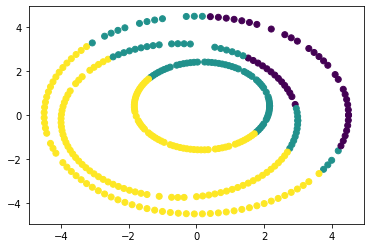

In [55]:
data_with_clusters = sc_df.copy()
data_with_clusters['Clusters'] = predictions_train_sc 
plt.scatter(data_with_clusters['0'],data_with_clusters['1'],c=data_with_clusters['Clusters'])

In [56]:
from sklearn.linear_model import Perceptron
p = Perceptron(random_state=42)
p.fit(sc_df_x_train, sc_df_y_train)
perceptron_predict = p.predict(sc_df_x_train)
perceptron_predict

array([1, 0, 1, 0, 1, 1, 2, 1, 0, 0, 0, 1, 2, 1, 0, 0, 0, 1, 2, 1, 0, 1,
       1, 1, 1, 0, 2, 2, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 2, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 2, 2, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 2, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 2, 2, 1, 1,
       0, 0, 0, 1, 2, 0, 1, 1, 1, 2, 0, 1, 2, 1, 1, 0, 2, 1, 1, 2, 1, 0,
       1, 2, 0, 0, 2, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 2, 1, 2, 1, 1, 2, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 2, 0, 1,
       1, 1, 2, 0, 2, 0, 1, 0, 1, 1, 0, 0, 0, 2, 1, 0, 0, 1, 1, 1, 0, 2,
       0, 0, 2, 1, 1, 0, 1, 0, 0, 1, 2, 0, 2, 2, 1, 1, 1, 1, 2, 1, 0, 1,
       1, 2, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 2, 2, 0, 1, 0, 0, 0,
       2, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 2, 0,
       2, 0, 0, 2, 1, 1, 2, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 2, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 2, 0, 0, 2, 1, 2, 2, 0, 1, 1, 0, 1, 0, 1,

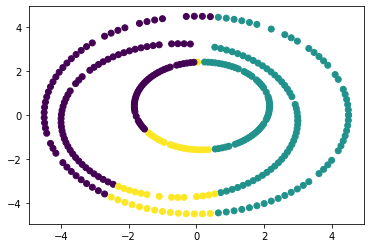

In [57]:
data_with_clusters = sc_df.copy()
data_with_clusters['Clusters'] =  perceptron_predict
plt.scatter(data_with_clusters['0'],data_with_clusters['1'],c=data_with_clusters['Clusters'])

# Task 5: Guess the accuracy of KNN
Based on the work from Task 1, guess how KNN would perform on new training data set. Do you think the accuracy will increase or decrease. Explain why.

In [58]:
x_test

,0,1
0,-1.749593,-0.156003
1,0.368625,3.140500
2,-1.799280,0.049168
3,-0.177061,-3.735070
4,3.160910,3.202912
5,-3.264976,1.895905
6,-0.914822,-3.725331
7,2.097375,0.938554
8,0.006415,3.213170
9,-1.898791,4.079779


In [59]:
def KNNclassifierSC(i):
    classifier = KNeighborsClassifier(n_neighbors=i)
    classifier.fit(sc_df_x_train, sc_df_y_train)
    y_pred = classifier.predict(sc_df_x_train)
    return y_pred

In [60]:
C_SC = []
nearest_neighbors = [1,10,50,100]
for i in nearest_neighbors:
    c = KNNclassifierSC(i)
    C_SC.append(c)
C_SC_df = pd.DataFrame(C_SC)
C_SC_df = C_SC_df.T
C_SC_df

,0,1,2,3
0,1,1,1,1
1,2,2,2,2
2,0,0,0,1
3,2,2,2,2
4,1,1,1,1
...,...,...,...,...
319,2,2,2,2
320,0,0,0,1
321,1,1,1,1
322,0,0,2,2


In [61]:
sc_result_test = pd.concat([sc_df,C_SC_df ], axis=1, join="inner")
sc_result_test

,0,1,SC Predict,0,1,2,3
0,1.990883,-0.403233,1,1,1,1,1
1,-3.853454,-1.252172,2,2,2,2,2
2,3.887177,2.267125,0,0,0,0,1
3,-3.475760,1.592513,2,2,2,2,2
4,0.663024,-1.520762,1,1,1,1,1
...,...,...,...,...,...,...,...
319,-3.969552,0.210658,2,2,2,2,2
320,-1.231483,4.328215,0,0,0,0,1
321,-0.380659,2.340318,1,1,1,1,1
322,2.005823,-4.028235,0,0,0,2,2


In [62]:
cc1 = KNNclassifier(1)
cc10 = KNNclassifier(10)
cc50 = KNNclassifier(50)
cc100 = KNNclassifier(100)
# Accuracy score for K means model:
acc_score_knn1 = accuracy_score(y_true=sc_df_y_train, y_pred=cc1)
print("Accuracy Score for KNN on K-means when Near_neighbors = 1:",acc_score_knn1)
acc_score_knn10 = accuracy_score(y_true=sc_df_y_train, y_pred=cc10)
print("Accuracy Score for KNN on K-means when Near_neighbors = 10:",acc_score_knn10)
acc_score_knn50 = accuracy_score(y_true=sc_df_y_train, y_pred=cc50)
print("Accuracy Score for KNN on K-means when Near_neighbors = 50:",acc_score_knn50)
acc_score_knn100 = accuracy_score(y_true=sc_df_y_train, y_pred=cc100)
print("Accuracy Score for KNN on K-means when Near_neighbors = 100:",acc_score_knn100)

Accuracy Score for KNN on K-means when Near_neighbors = 1: 0.3425925925925926
Accuracy Score for KNN on K-means when Near_neighbors = 10: 0.3425925925925926
Accuracy Score for KNN on K-means when Near_neighbors = 50: 0.3395061728395062
Accuracy Score for KNN on K-means when Near_neighbors = 100: 0.33641975308641975


In [63]:
cc1 = KNNclassifierSC(1)
cc10 = KNNclassifierSC(10)
cc50 = KNNclassifierSC(50)
cc100 = KNNclassifierSC(100)
# Accuracy score for K means model:
acc_score_knn1 = accuracy_score(y_true=sc_df_y_train, y_pred=cc1)
print("Accuracy Score for KNN when Near_neighbors = 1:",acc_score_knn1*100,"%")
acc_score_knn10 = accuracy_score(y_true=sc_df_y_train, y_pred=cc10)
print("Accuracy Score for KNN when Near_neighbors = 10:",acc_score_knn10*100,"%")
acc_score_knn50 = accuracy_score(y_true=sc_df_y_train, y_pred=cc50)
print("Accuracy Score for KNN when Near_neighbors = 50:",acc_score_knn50*100,"%")
acc_score_knn100 = accuracy_score(y_true=sc_df_y_train, y_pred=cc100)
print("Accuracy Score for KNN when Near_neighbors = 100:",acc_score_knn100*100,"%")

Accuracy Score for KNN when Near_neighbors = 1: 100.0 %
Accuracy Score for KNN when Near_neighbors = 10: 98.4567901234568 %
Accuracy Score for KNN when Near_neighbors = 50: 73.4567901234568 %
Accuracy Score for KNN when Near_neighbors = 100: 58.333333333333336 %


**Explanation:** We have clustered our data using two clustering techniques viz. K-Means and Spectral Clustering. Our aim here is to cluster the data in circles and not in arcs. It can be observed that K-means clusters in form of arcs and Spectral Clustering clusters the data points in concentric circles. When we use the labels genrated from K-means and train our model using KNN, the accuracy score with respect to our desired output is comparatively low as when we train the model using KNN with spectral clustering labels. The above cells represent the accuracy score and the difference is clearly visible. Hence, we can conclude using the observations that Spectral Clustering labeled KNN model gives us a better accuracy to retrieve the desired output in comparison to the K-means labeled KNN Models.

# Task 6: Regularization
Predict the cluster ID on the test data set. Visualize the result to show that each observation belongs to the same circle from the training data set. 

In [64]:
sc_x_test = df_test[['0','1']]
sc_x_test

,0,1
0,-1.749593,-0.156003
1,0.368625,3.140500
2,-1.799280,0.049168
3,-0.177061,-3.735070
4,3.160910,3.202912
5,-3.264976,1.895905
6,-0.914822,-3.725331
7,2.097375,0.938554
8,0.006415,3.213170
9,-1.898791,4.079779


In [65]:
classifier_SC = KNeighborsClassifier(n_neighbors=1)
classifier_SC.fit(sc_df_x_train, sc_df_y_train)
y_pred = classifier_SC.predict(sc_x_test)
y_pred

array([1, 2, 1, 2, 0, 2, 2, 1, 2, 0, 2, 0, 2, 1, 2, 0, 1, 1, 2, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 2, 2, 2, 0, 1, 1], dtype=int32)

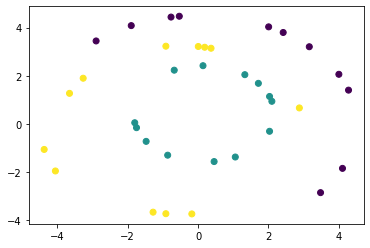

In [66]:
data_with_clusters = x_test.copy()
data_with_clusters['Clusters'] =  y_pred
plt.scatter(data_with_clusters['0'],data_with_clusters['1'],c=data_with_clusters['Clusters'])

# Task 7: Summary


To summarize, we have used the training set which has no labels. The data is unlabeled which leaves us with the resort of labeling the data points using unsupervised learning techniques viz. Clustering algorithms like K-means and Spectral Clustering. K-means clusters the data points in arcs whereas Spectral clustering clusters the data in Concentric Circles. We have in Task 1 used the labels generated from K-means clustering and then using the labeled data performed classification using Logistic Regression and KNN.

In task 2, I have feature engineered the data by erforming PCA and LDA and generated new training dataset. Further in task 3, I have performed Spectral Clustering and using the labeled data performed Classification using Logistic Regression, Perceptron, LDA , KNN and compared the accuracy of these models.

Hence, we can conclude that Spectral Clustering gives us better accuracy than K-means with respect to the output we are aiming for. Spectral clustering aids in the resolution of two fundamental clustering issues: the form of the cluster and locating the cluster centroid. The K-means method presupposes that clusters are spherical or circular, and that they are within a k-radius of the cluster center. In K means, determining the cluster centroid takes a lot of iterations. Clusters in spectrum do not have a definite shape or pattern. Points that are far apart but connected belong to the same cluster, whereas points that are closer together but not connected may belong to distinct clusters. This suggests that the algorithm might work with data of all forms and sizes.